Fetching stock data...


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           252 non-null    datetime64[ns]
 1   (Adj Close, AAPL)  252 non-null    float64       
 2   (Close, AAPL)      252 non-null    float64       
 3   (High, AAPL)       252 non-null    float64       
 4   (Low, AAPL)        252 non-null    float64       
 5   (Open, AAPL)       252 non-null    float64       
 6   (Volume, AAPL)     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB
None
Calculating SMA...
Calculating Support and Resistance levels...
Preparing data for regression...
Training regression model...
Mean Squared Error: 99.3943206358
R-squared Error: 82.27%


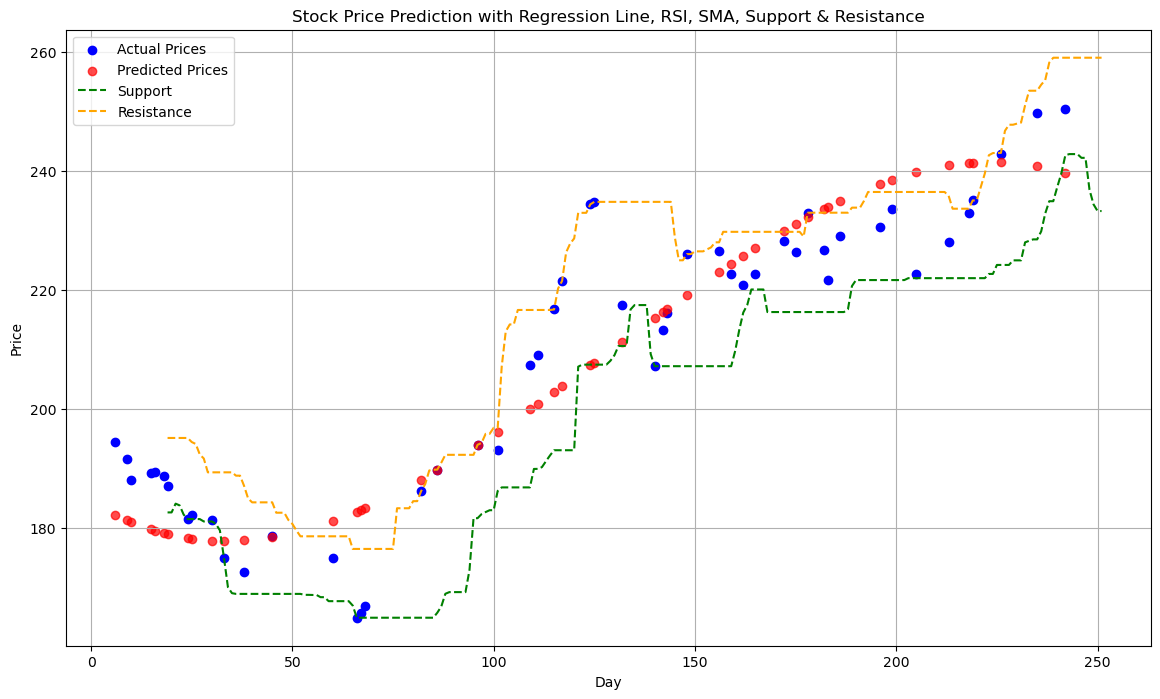

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator

# Step 1: Download stock data (Replace 'AAPL' with your desired stock ticker)
print("Fetching stock data...")
ticker = "BTC-USD"
stock_data = yf.download('AAPL', period='1y', interval='1d')
stock_data = stock_data.reset_index()

# Step 2: Ensure the data contains 'Close' prices
if 'Close' not in stock_data.columns:
    raise ValueError("The data must contain a 'Close' column for closing prices.")

# Step 3: Calculate RSI
print(stock_data.info())
stock_data['Close'] = stock_data['Close'].fillna(method='ffill').fillna(method='bfill')

# Step 4: Calculate SMA
print("Calculating SMA...")
stock_data['SMA'] = stock_data['Close'].rolling(window=20).mean()

# Step 5: Calculate Support and Resistance
print("Calculating Support and Resistance levels...")
stock_data['Support'] = stock_data['Close'].rolling(window=20).min()
stock_data['Resistance'] = stock_data['Close'].rolling(window=20).max()

# Step 6: Prepare data for regression
print("Preparing data for regression...")
stock_data['Day'] = np.arange(len(stock_data))
X = stock_data[['Day']]
y = stock_data['Close']

# Step 7: Polynomial Features for better fit
poly = PolynomialFeatures(degree=3)  # Adjust degree for better fit
X_poly = poly.fit_transform(X)

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 9: Train Regression Model
print("Training regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.10f}")
print(f"R-squared Error: {r2 * 100:.2f}%")

# Step 12: Plot Scatter Plot with Regression Line
plt.figure(figsize=(14, 8))
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual Prices')  # Actual prices
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted Prices', alpha=0.7)  # Predicted prices
plt.plot(stock_data['Day'], stock_data['Support'], color='green', linestyle='--', label='Support')
plt.plot(stock_data['Day'], stock_data['Resistance'], color='orange', linestyle='--', label='Resistance')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price Prediction with Regression Line, RSI, SMA, Support & Resistance')
plt.legend()
plt.grid()
plt.show()
